Article: TBA\
Code: Image Classification using Convolution Neural Network\
Prepared By: Awais Naeem (awais.naeem@embedded-robotics.com)\
Copyrights: www.embedded-robotics.com\
Disclaimer: This code can be distributed with the proper mention of the owner copyrights

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import mnist

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
X_test.shape

(10000, 28, 28)

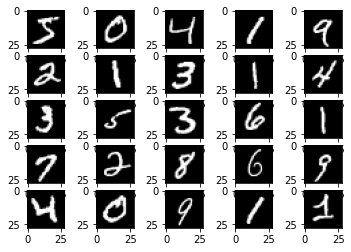

In [24]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [25]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))


In [26]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [27]:
image_shape = X_train.shape[1:]

In [28]:
n_classes = len(np.unique(y_train))

In [29]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [31]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape = image_shape))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [32]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 44s 88ms/step - loss: 0.3966 - accuracy: 0.8771
Epoch 2/10
469/469 [==============================] - 41s 88ms/step - loss: 0.1621 - accuracy: 0.9525
Epoch 3/10
469/469 [==============================] - 37s 79ms/step - loss: 0.1239 - accuracy: 0.9641
Epoch 4/10
469/469 [==============================] - 51s 109ms/step - loss: 0.0967 - accuracy: 0.9707
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0869 - accuracy: 0.9739
Epoch 6/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0761 - accuracy: 0.9766
Epoch 7/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0690 - accuracy: 0.9785
Epoch 8/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0629 - accuracy: 0.9807
Epoch 9/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0574 - accuracy: 0.9819
Epoch 10/10
469/469 [==============================] - ETA: 0s - loss: 0.0519 - a

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0406 - accuracy: 0.9864


[0.0406123548746109, 0.9864000082015991]